<a href="https://colab.research.google.com/github/Pradulya/hotel-booking-analysis6/blob/main/Pradulya_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#import pacages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#mount google drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#uploading csv file from google drive
df=pd.read_csv('/content/drive/MyDrive/almabetter/Hotel Bookings.csv')

**Importing information about dataset**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Checking the null value in data**


In [ ]:
df.isnull().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['company','agent','country','children'], inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  market_segment  

 **Data Description:**

hotel : Hotel(Resort Hotel or City Hotel)

is_canceled : Value indicating if the booking was canceled (1) or not ()

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality

meal packages

country : Country of origin

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means

“Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons

assigned_room_type : Code for the type of room assigned to the booking

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking.

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status : Reservation last status, assuming one of three categories • Canceled – booking was canceled by the customer • Check-Out – customer has checked in but already departed • No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

# **BOOKING PER YEAR**


In [ ]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

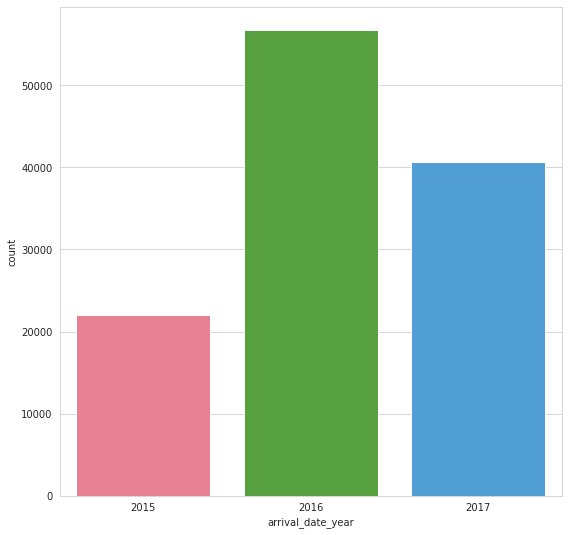

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(x=df['arrival_date_year'], palette='husl')
plt.show()


observation: we have found that in year 2016 have highest number of booking were halt.

# **Monthwise special request in hotel**

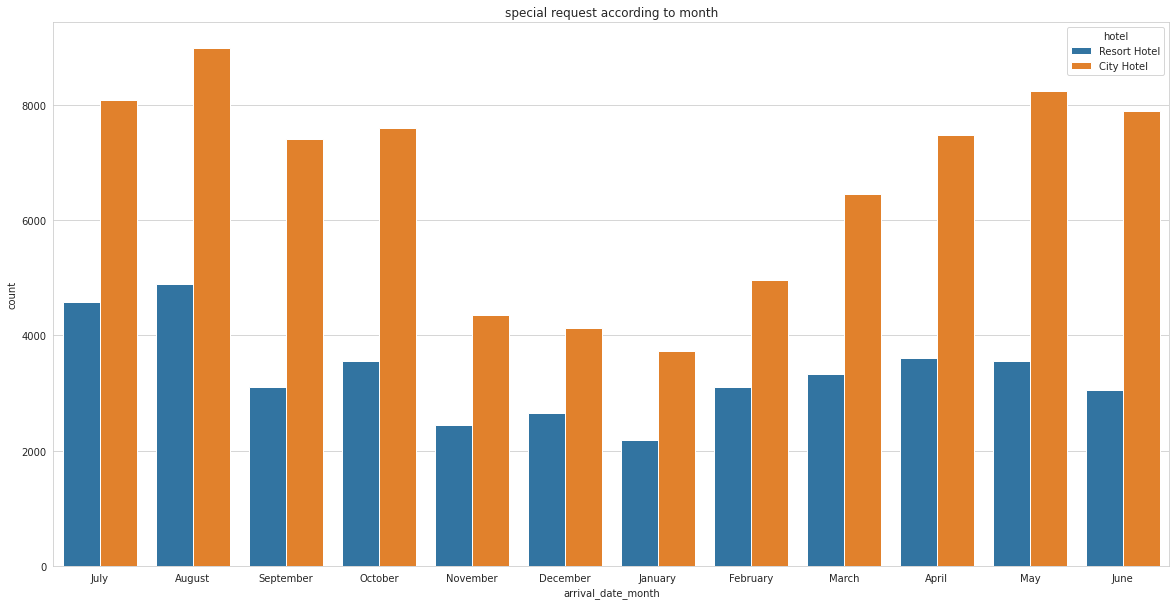

In [ ]:
#Below graphical reptresentation shows the monthwise special request in hotel

plt.figure(figsize=(20,10))

sns.countplot(x=df['arrival_date_month'],hue=df['hotel'])
plt.title('special request according to month')
sns.set(font_scale=1)

# **TYPES OF HOTELS**

In [ ]:
#Types of Hotels

df['hotel'].value_counts()


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

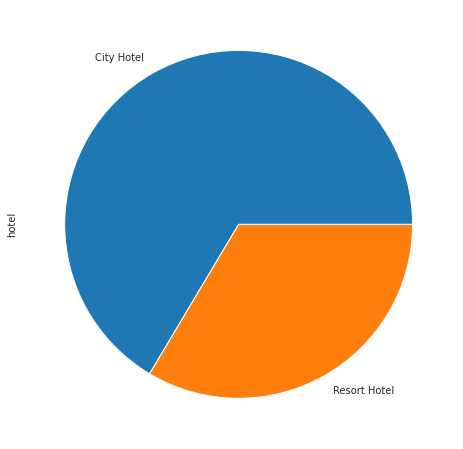

In [ ]:
df['hotel'].value_counts().plot(kind='pie')


**Majority of the booked Hotel is City Hotel than Resort Hotel**

# **HOTEL BOOKING RATIO BETWEEN RESORT HOTEL AND CITY**

([<matplotlib.patches.Wedge at 0x7f504b925910>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

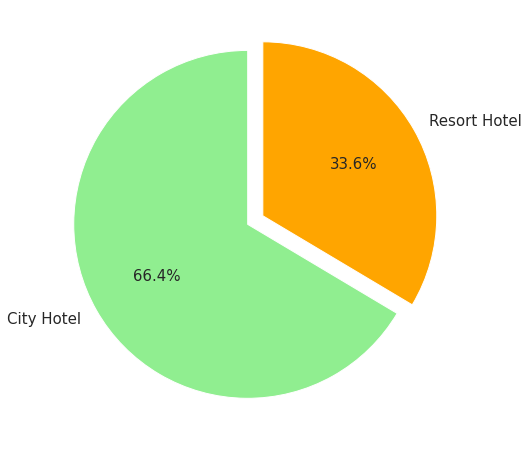

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()

explode = (0, 0.1)
colors = ['lightgreen','ORANGE']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 15})


### **observation - City hotel have highest number of ratio**

# **How many bookings got canceled?**

Text(0.5, 1.0, 'Bookings Cancelation Status')

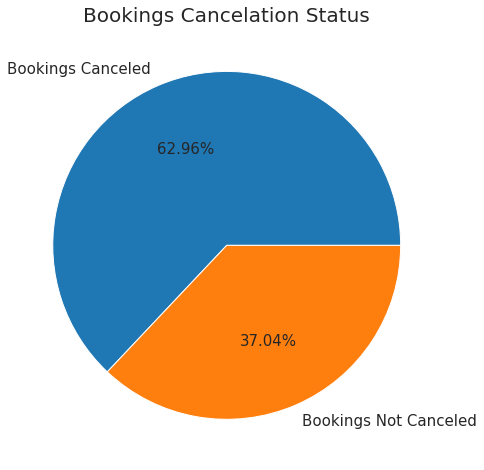

In [ ]:
df.groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Canceled", "Bookings Not Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(8, 8))
plt.ylabel('' , fontsize=16)
plt.title('Bookings Cancelation Status', fontsize=20)


**conclusition - 62% of booking gets canceled.**



# **Which type of food is mostly preferred by the guests?**


Text(0.5, 1.0, 'Preferred Meal Type')

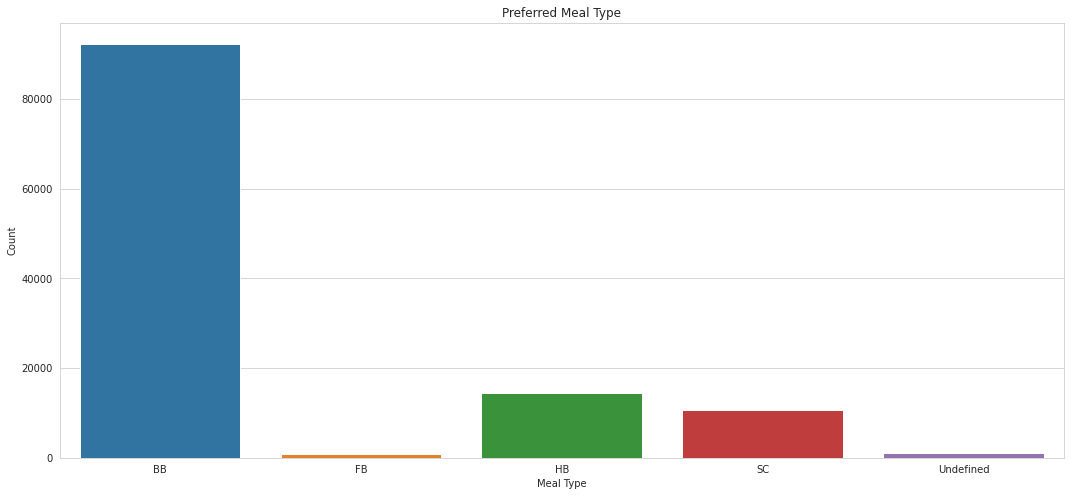

In [ ]:
# df1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(25,20),fontsize=25)
plt.figure(figsize=(18,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")


Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)
  So the most preferred meal type by the guests is BB( Bed and Breakfast) 
  HB- (Half Board) and SC- (Self Catering) are equally preferred.



# **what is the customer that special reservation status?**

below countplot show that customer reservation status in hotel

Text(0.5, 0, 'reservation_status')

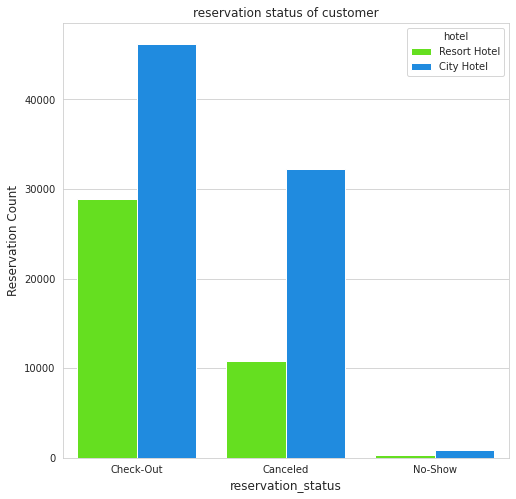

In [ ]:
#sns.set(crc{'figure.figsize:(15,12)})
sns.countplot(x=df['reservation_status'], hue='hotel',data=df, palette='gist_rainbow')
plt.title('reservation status of customer')
plt.ylabel('Reservation Count',fontsize=12)
plt.xlabel('reservation_status',fontsize=12)